# Parameter estimation

It is important to distinguish between the *population* parameters of a distribution and their *sample estimates*. To understand the difference, let's begin by imagining a giant ball pit with 10,000 balls. Each ball is either red or green, but we don't know how many of each color there are.

```{image} ./images/ball_pit.png
:alt: Baby in ball pit. Adobe Stock photo 268103982
:class: adobe
:width: 450px
:align: right
```

You have three minutes to make the best possible estimate of how many red balls there are. This clearly isn't enough time to look at every ball in the pit, so we will have to come up with another way to estimate the proportion of red balls.

A good solution is to take a random sample of the balls in the pit and use that sample to infer something about the rest of the balls that we didn't examine.

In this example, the number of red balls, $Y$, is described by a Binomial distribution, $Y\sim B(N,p)$. Each ball is either red (a "success") or not (a "failure"). We have $N=10000$ "trials." We know that each ball has a probability of success $p$, but we don't know what that probability is. (If our ball pit looked like the one in the picture, with more than two colors, we would use the [Multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) instead.)

For example, suppose that in the three minutes we are able to look at 180 balls, and we find that 66 of them are red. Our *sample estimate* of the proportion of red balls is ${66\over 180} = 0.3667$. This is an estimate of the unknown *population* paramter $p$, which we'll denote by $\hat p$. We can think of this estimate as a prediction about the truth for this larger population that we don't know. (In machine learning, the population value is also called the *ground truth*.)

We saw previously that the expected value of a Binomial distributed random variable is $\E(Y) = Np$, so using our estimate $\hat p$ we would estimate that there are

$$N\times \hat p = 10000 \times 0.3667 = 3667$$

red balls in the ball pit.

The entire field of statistics seeks to understand properties of an estimate like this. One result, which is probably pretty intuitive, is that the bigger our sample, the more accurate our estimate will be. If instead of looking at 180 balls we were able to look at 500 balls, we could be more confident that our estimate of $p$ that is closer to the truth; with a sample of 9,000 balls we'd know with very high certainty that we are close to the truth. Actually, we can use statistical reasoning to know how close we can expect our estimate to be to the truth, as we'll see below.

## Sample mean

In general, we estimate distribution parameters using sample analogues of population values. That is, we replace population values with their corresponding estimates from the sample. Recall that the expected value of a random variable is

$$\E(X) = \sum_{\omega\in\Omega} \P(\omega)\, X(\omega).$$

We have data for a sample of $n$ observations from the population, $x_1, \ldots, x_n$. If we assume that each observation in our sample is equally likely to be in the sample — that is, we are *sampling randomly*—then the probability of any outcome $x_i$ is simply $1/n$. Therefore, the sample estimate of $\E(X)$ is

$$\hat \mu_x:= \bar x = \sum_{i=1}^n \frac{1}{n} x_i =  \frac{1}{n} \sum_{i=1}^n x_i.$$

That is, we simply replace the population parameter $\P(x_i)$ with its sample analgoue—the probability of observing the value in the sample, or $1/n$.

We can use simulations to see how these estimates work. Here, we'll simulate a ball pit that has exactly 4,000 red balls so the population parameter $p=0.4$. The "pit" is simply an array of length 10,000, with 4,000 ones and 6,000 zeros.

In [2]:
# Simulate a ball pit with 4000 red balls and 6000 green balls
# red=1, green=0
balls = np.array([1]*4000 + [0]*6000)

# Randomize the balls
rng.shuffle(balls)

In [3]:
# Count red balls and total balls
balls.sum(), len(balls)

(4000, 10000)

In [4]:
# Look at first 20 balls
balls[:20]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [5]:
# Take a sample of 180 balls
sample = rng.choice(balls, 180)

sample

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1])

In [6]:
# estimate p with the sample mean
p_hat = sample.mean()

print('Our estimate of p is {:0.3f}, implying an estimate {:.0f} red balls.'
      .format(p_hat, p_hat*10000))

Our estimate of p is 0.433, implying an estimate 4333 red balls.


As we sample more of the data, our estimate becomes more accurate. We might get lucky looking at only 25 observations, but we'll get far more reliable estimates looking at 5,000 observations.

In [7]:
print('n\tp_hat\tRed balls')
print('-'*25)
for n in [25, 100, 250, 1000, 5000]:
    sample = rng.choice(balls, n)
    p_hat = sample.mean()
    print('{}\t{:0.3f}\t{:.0f}'.format(n, p_hat, p_hat*10000))

n	p_hat	Red balls
-------------------------
25	0.360	3600
100	0.340	3400
250	0.380	3800
1000	0.391	3910
5000	0.399	3992


## The Central Limit Theorem

:::{margin}
With 10,000 balls, there is a mind-boggling number of possible samples of 180 balls we could take: approximately $10^{390}$. For comparison, the universe is [estimated](https://en.wikipedia.org/wiki/Eddington_number) to have about $10^{80}$ atoms.
:::

Any sample we take from the population is just one of the possible samples that we could have taken. It is clear having more observations in a sample makes the estimate more precise, but by how much? In other words, how much variation can we expect there to be between samples? If we repeatedly take samples of 180 balls, will the $\hat p$ estimates in each sample be similar?

Let's again use a simulation to see much the estimates vary across samples. The plot below shows three histograms from the following experiment. First, we set a sample size to be $n \in \{25, 125, 750\}$. For each $n$, we then take 1,000 independent samples from the population of 10,000 balls and calculate $\hat p_i$, $i=1,\ldots, 1000$.

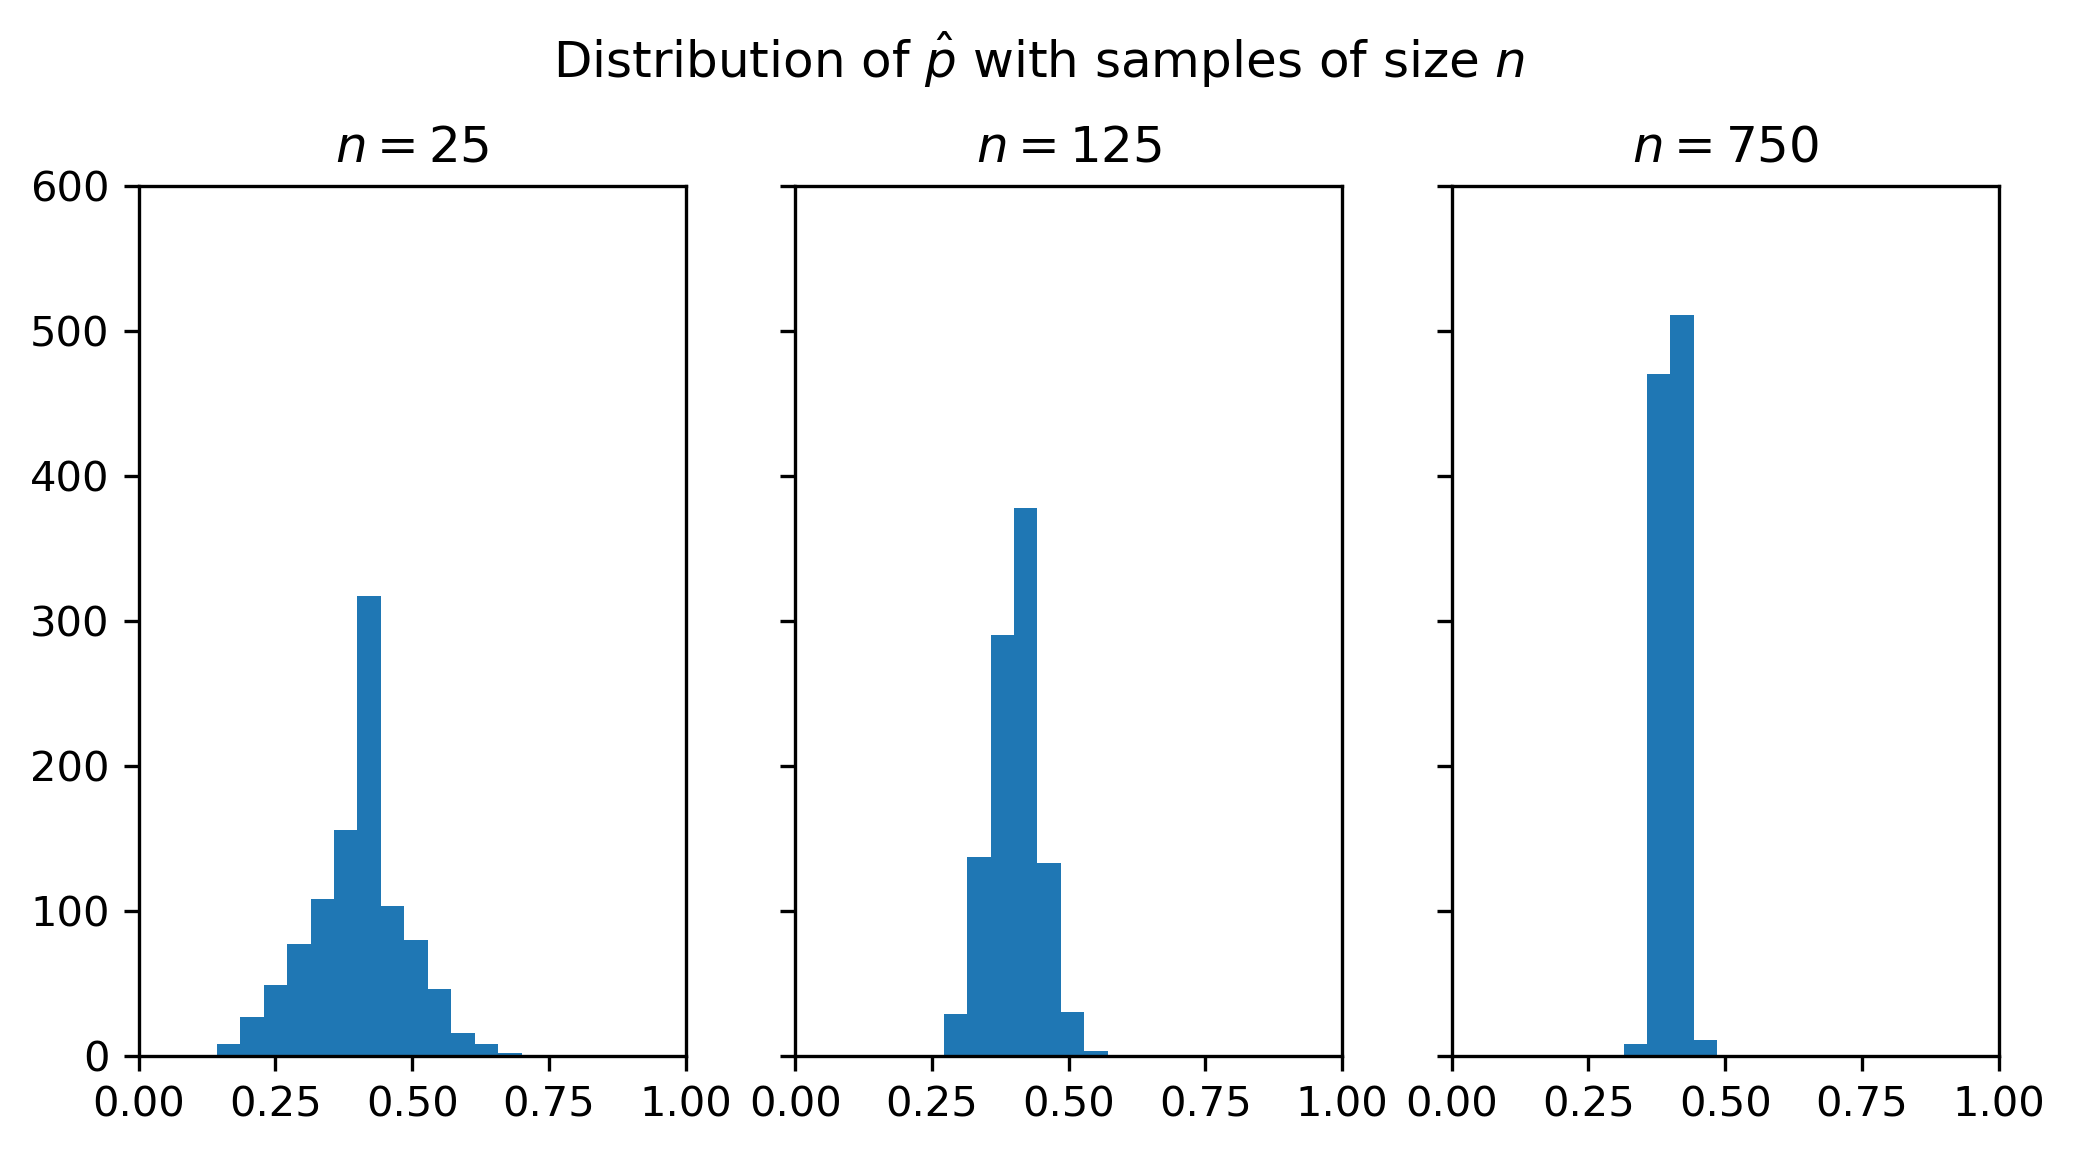

In [8]:
p_hats = {}
fig, axes = plt.subplots(1, 3, figsize=(8,4))
fig.suptitle('Distribution of $\hat{p}$ with samples of size $n$')
fig.subplots_adjust(top=0.85)
for n, ax in zip([25, 125, 750], axes.ravel()):
    p_hats[n] = [rng.choice(balls, n).mean() for _ in range(1000)]
    ax.hist(p_hats[n], bins=np.linspace(0.1,0.7,15), label='$n={}$'.format(n))
    ax.set_xlim(0, 1)
    ax.set_ylim(0,600)
    if n>25:
        ax.set_yticklabels([])
    ax.set_title('$n={}$'.format(n))
plt.show()

There are three things to notice about the figure: 

1. All of the distributions are centered close to the true value of $p=0.4$. On average, the sample mean is correct.

2. The general shape of each distribution is similar to the familiar *bell curve* of the normal distribution.

3. There is more variation in the estimate $\hat p$ across samples when we have a smaller sample size. When $n=25$, the average estimate is still around 0.4, but in some samples the estimate is less than 0.2 and in other samples it's above 0.7. As we increase the sample size, the distribution becomes more tightly distributed around the mean. When $n=750$, almost all of the sample estimates are very close to 0.4.

The code below calculates the cutoff values for a range that contains 95% of the sample estimates for each of the three sample sizes.

In [10]:
for n in p_hats:
    qs = np.quantile(p_hats[n], [0.025, 0.975])
    print('n={}:\t({:0.3f}, {:0.3f})'.format(n, *qs))

n=25:	(0.200, 0.600)
n=125:	(0.312, 0.488)
n=750:	(0.365, 0.436)


The first fact—that the average of the sample mean from different samples is the true mean—is a general fact about the sample mean. In particular, using properties of the expectations operator, we can see that

$$\E(\bar x_n) = \E\left[\frac{1}{n} \sum_{i=1}^n x_i\right] = \frac{1}{n}\sum_{i=1}^n \E(X) = \frac{1}{n}\cdot n \cdot\E(X) = \E(X).$$

That is, the expected value of the sample mean is the true parameter $\mu_x$. The technical term for this is that the sample mean is an *unbiased* estimate of $\mu$.

:::{admonition} Key fact
Closely related to the fact that $\E(\bar x_n) = \E(X)$ is an important result known as the **Law of Large Numbers** (LLN), which says that

$$\lim_{n\to\infty} \bar x = \mu,$$

or that $\bar x$ *converges to* $\mu$. This is a statistical "law" that says that—provided certain technical criteria about the random variable $X$ are met—we can get arbitrarily close to knowing $\mu$ by sampling enough data. An example where the LLN fails is the [Cauchy distribution](cauchy), which we'll see below.
:::

The figure below illustrates the LLN for a Bernoulli random variable. Each dot is an observation from the distribution. The solid line shows the value of $\bar x_n$ after $n$ draws. As we have more observations, this average converges to the population value $\mu$.

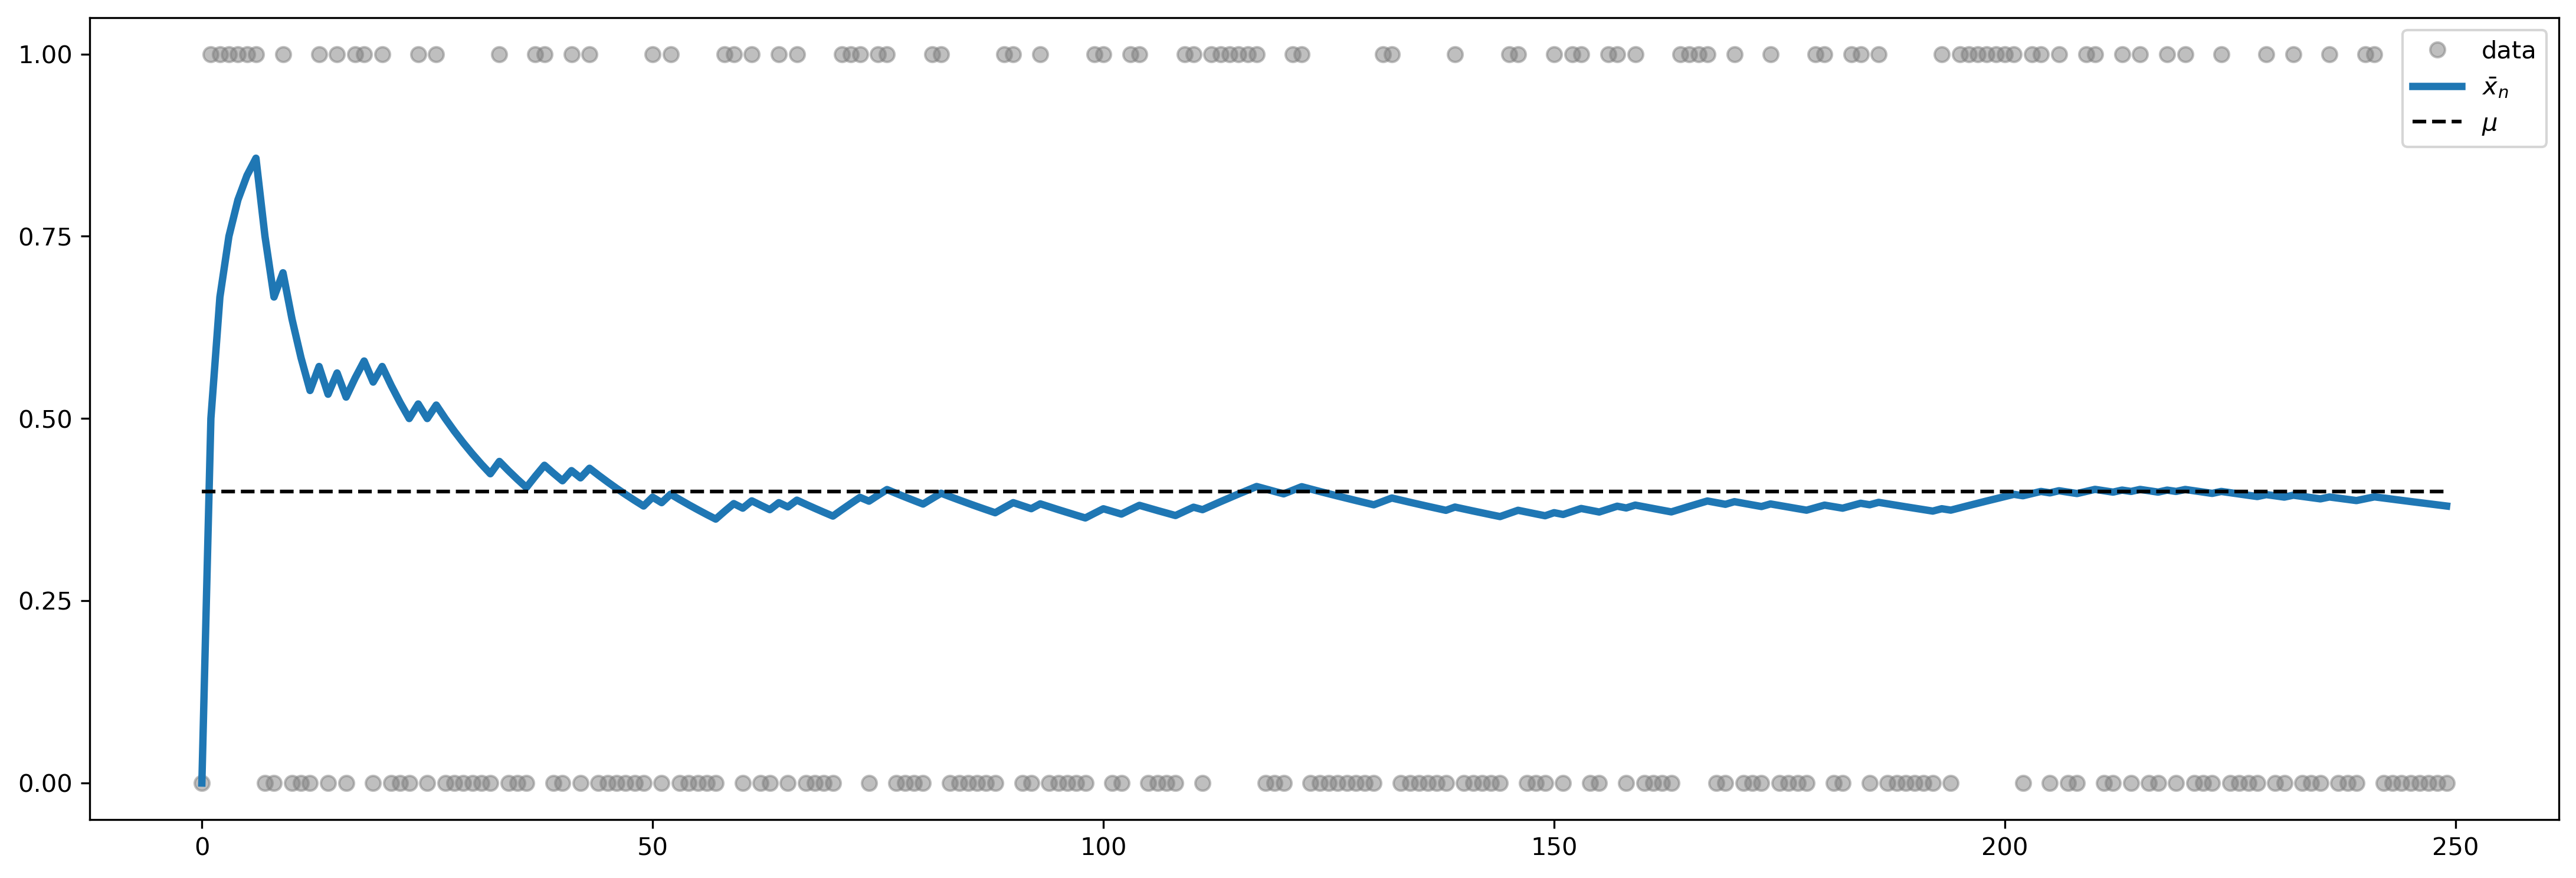

In [11]:
n = 250
p = 0.4
flips = scs.bernoulli(p).rvs(n, random_state=rng)

fig, ax = plt.subplots(figsize=(18,6))

# cumulative frequency of Heads
sample_mean = flips.cumsum() / np.arange(1,len(flips)+1)

ax.plot(np.arange(n), flips, 'o', color='grey', alpha=0.5, label='data')
ax.plot(sample_mean, '-', lw=3, label='$\\bar x_n$')
ax.plot(np.arange(n), [p]*n, 'k--', lw=1.5, label='$\mu$')

ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.legend()

plt.show()

We can also calculate the variance of the sample mean, which is

$$\var(\bar x_n) = \var\left[\frac{1}{n} \sum_{i=1}^n x_i\right] = \frac{1}{n^2} \var\left[\sum_{i=1}^n x_i\right] = \frac{\var(X)}{n} = \frac{\sigma^2}{n}.$$

As we get more data (that is, $n \to \infty$), the variance of the sample mean approaches zero. This is consistent with what we saw above—that we become more certain of exactly what the population mean really is when we have a larger sample.

:::{admonition} Key fact
All three facts above are summarized by a fundamentally important result in statistics, the **Central Limit Theorem**, which says that

$$\bar x_n \stackrel{d}{\to} \N\left(\mu, \frac{\sigma^2}{n}\right),$$

where $\stackrel{d}{\to}$ means “converges in distribution”. The theoretical standard deviation of the mean, $\frac{\sigma}{\sqrt{n}},$ is called the *standard error of the mean*.

This is a general statement about *any* probability distribution (as long as the second moment is finite). In other words, with few exceptions, *whatever* the underlying distribution of $X$ is, its sample mean converges to a normal distribution. This allows us to make very specific statments about how confident we are about observing any particular result.
:::

:::{admonition} Exercise
Let $Z=\sqrt{n}\left(\frac{\bar x_n - \mu}{\sigma}\right).$ Show that $\E(Z) = 0$ and $\var(Z)=1$.
:::

:::{admonition} Solution
:class: admonition-solution, dropdown

Recall that $\var(a + bX) = b^2\var(X)$ for constants $a$ and $b$. Here, $n$ and $\mu$ are constants, not random variables. Therefore,

$$\E(Z) = \frac{\sqrt{n}}{\sigma} (\E(\bar x_n) - \mu) = \frac{\sqrt{n}}{\sigma} (\mu - \mu) = 0,$$

and

$$\var(Z) = \frac{n}{\sigma^2} \var(\bar x_n) = \frac{n}{\sigma^2} \frac{\sigma^2}{n} = 1.$$
:::

The central limit theorem tells us what the distribution of the sample mean is. The figure below displays again the histogram for the means from 1,000 samples of size $n=25$, along with a normal distribution with $\mu=p=0.4$ and $\sigma^2 = p(1-p)/n$.

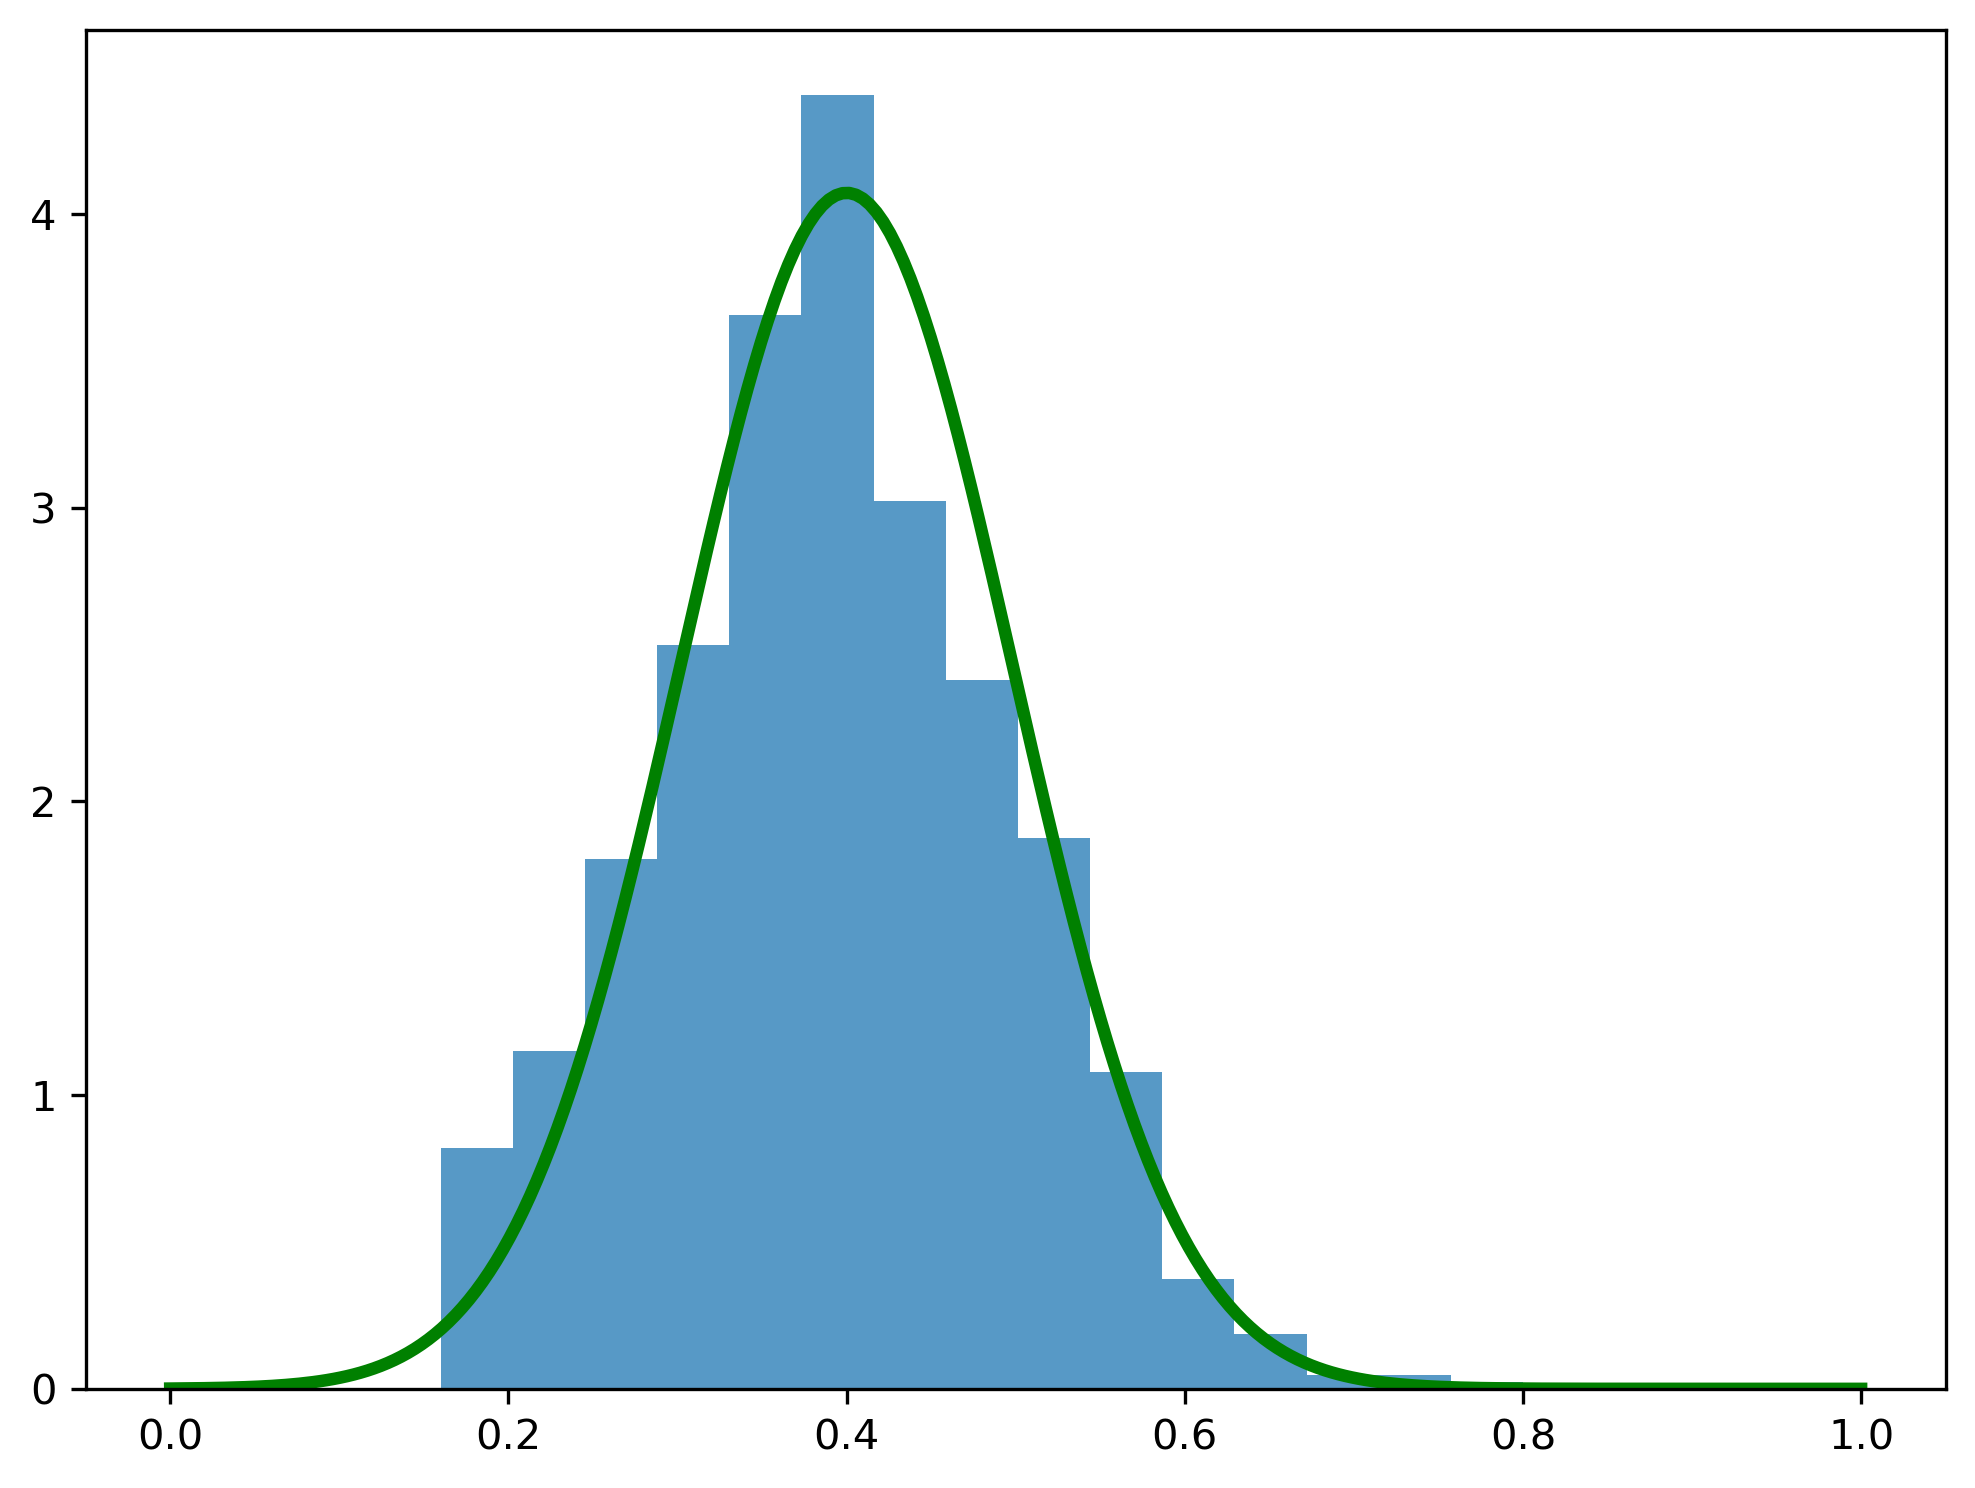

In [12]:
n = 25

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(p_hats[n], bins=15, density=True, alpha=0.75)

μ = 0.4
sem = np.sqrt(0.4*0.6/n)

x = np.linspace(0, 1, 250)
pdf = scs.norm.pdf(x, μ, sem)
plt.plot(x, pdf, 'g', linewidth=3)

plt.show()

The Normal PDF fits the actual distribution of the mean quite well. In most real-world situations we won't know the true value of $\mu$ and $\sigma^2$, but we already know how to estimate them. Given these two parameter estimates, we can then use the CLT to tell us how confident we can be about these estimates.

For example, if we draw one sample of 180 balls we might get the following:

In [13]:
n = 180

sample = rng.choice(balls, n)

μ = sample.mean()
σ = sample.std()
# standard error of the mean
sem = σ/np.sqrt(n)
μ, sem

(0.37222222222222223, 0.03603029893993332)

The sample mean is {glue:}`mu` and the standard error of the mean is {glue:}`sem`. Our best guess for the proportion of red balls is therefore {glue:}`mu`, but the CLT also tells us that this estimate has a standard error of {glue:}`sem`. Since 95% of the probability in a Normal distribution is within ±1.96 standard deviations of the mean, this means that we can should expect that 95% of the time the true population value of the $p$ will be between {glue:}`ci_l` and {glue:}`ci_u`.

(cauchy)=
## The Cauchy distribution

The LLN does not always hold. Some distributions generate such extreme outliers that the mean, variance, and other moments do not even exist! Yes, we can always calculate a *sample* mean or variance, but this isn't a useful estimate of anything.

An example of such a case is the Cauchy distribution. Its PDF is

$$f(x;x_0, \gamma) = \frac{1}{\pi\gamma\left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}$$

where $x_0$ and $\gamma$ are the location and scale parameters, respectively. Looking at its PDF and CDF, it is not immediately apparent that something is unusual about this distribution. The PDF looks a lot like the Normal. But if you look closely, you see that the tails looks suspiciously fat. And therein lies the problem.

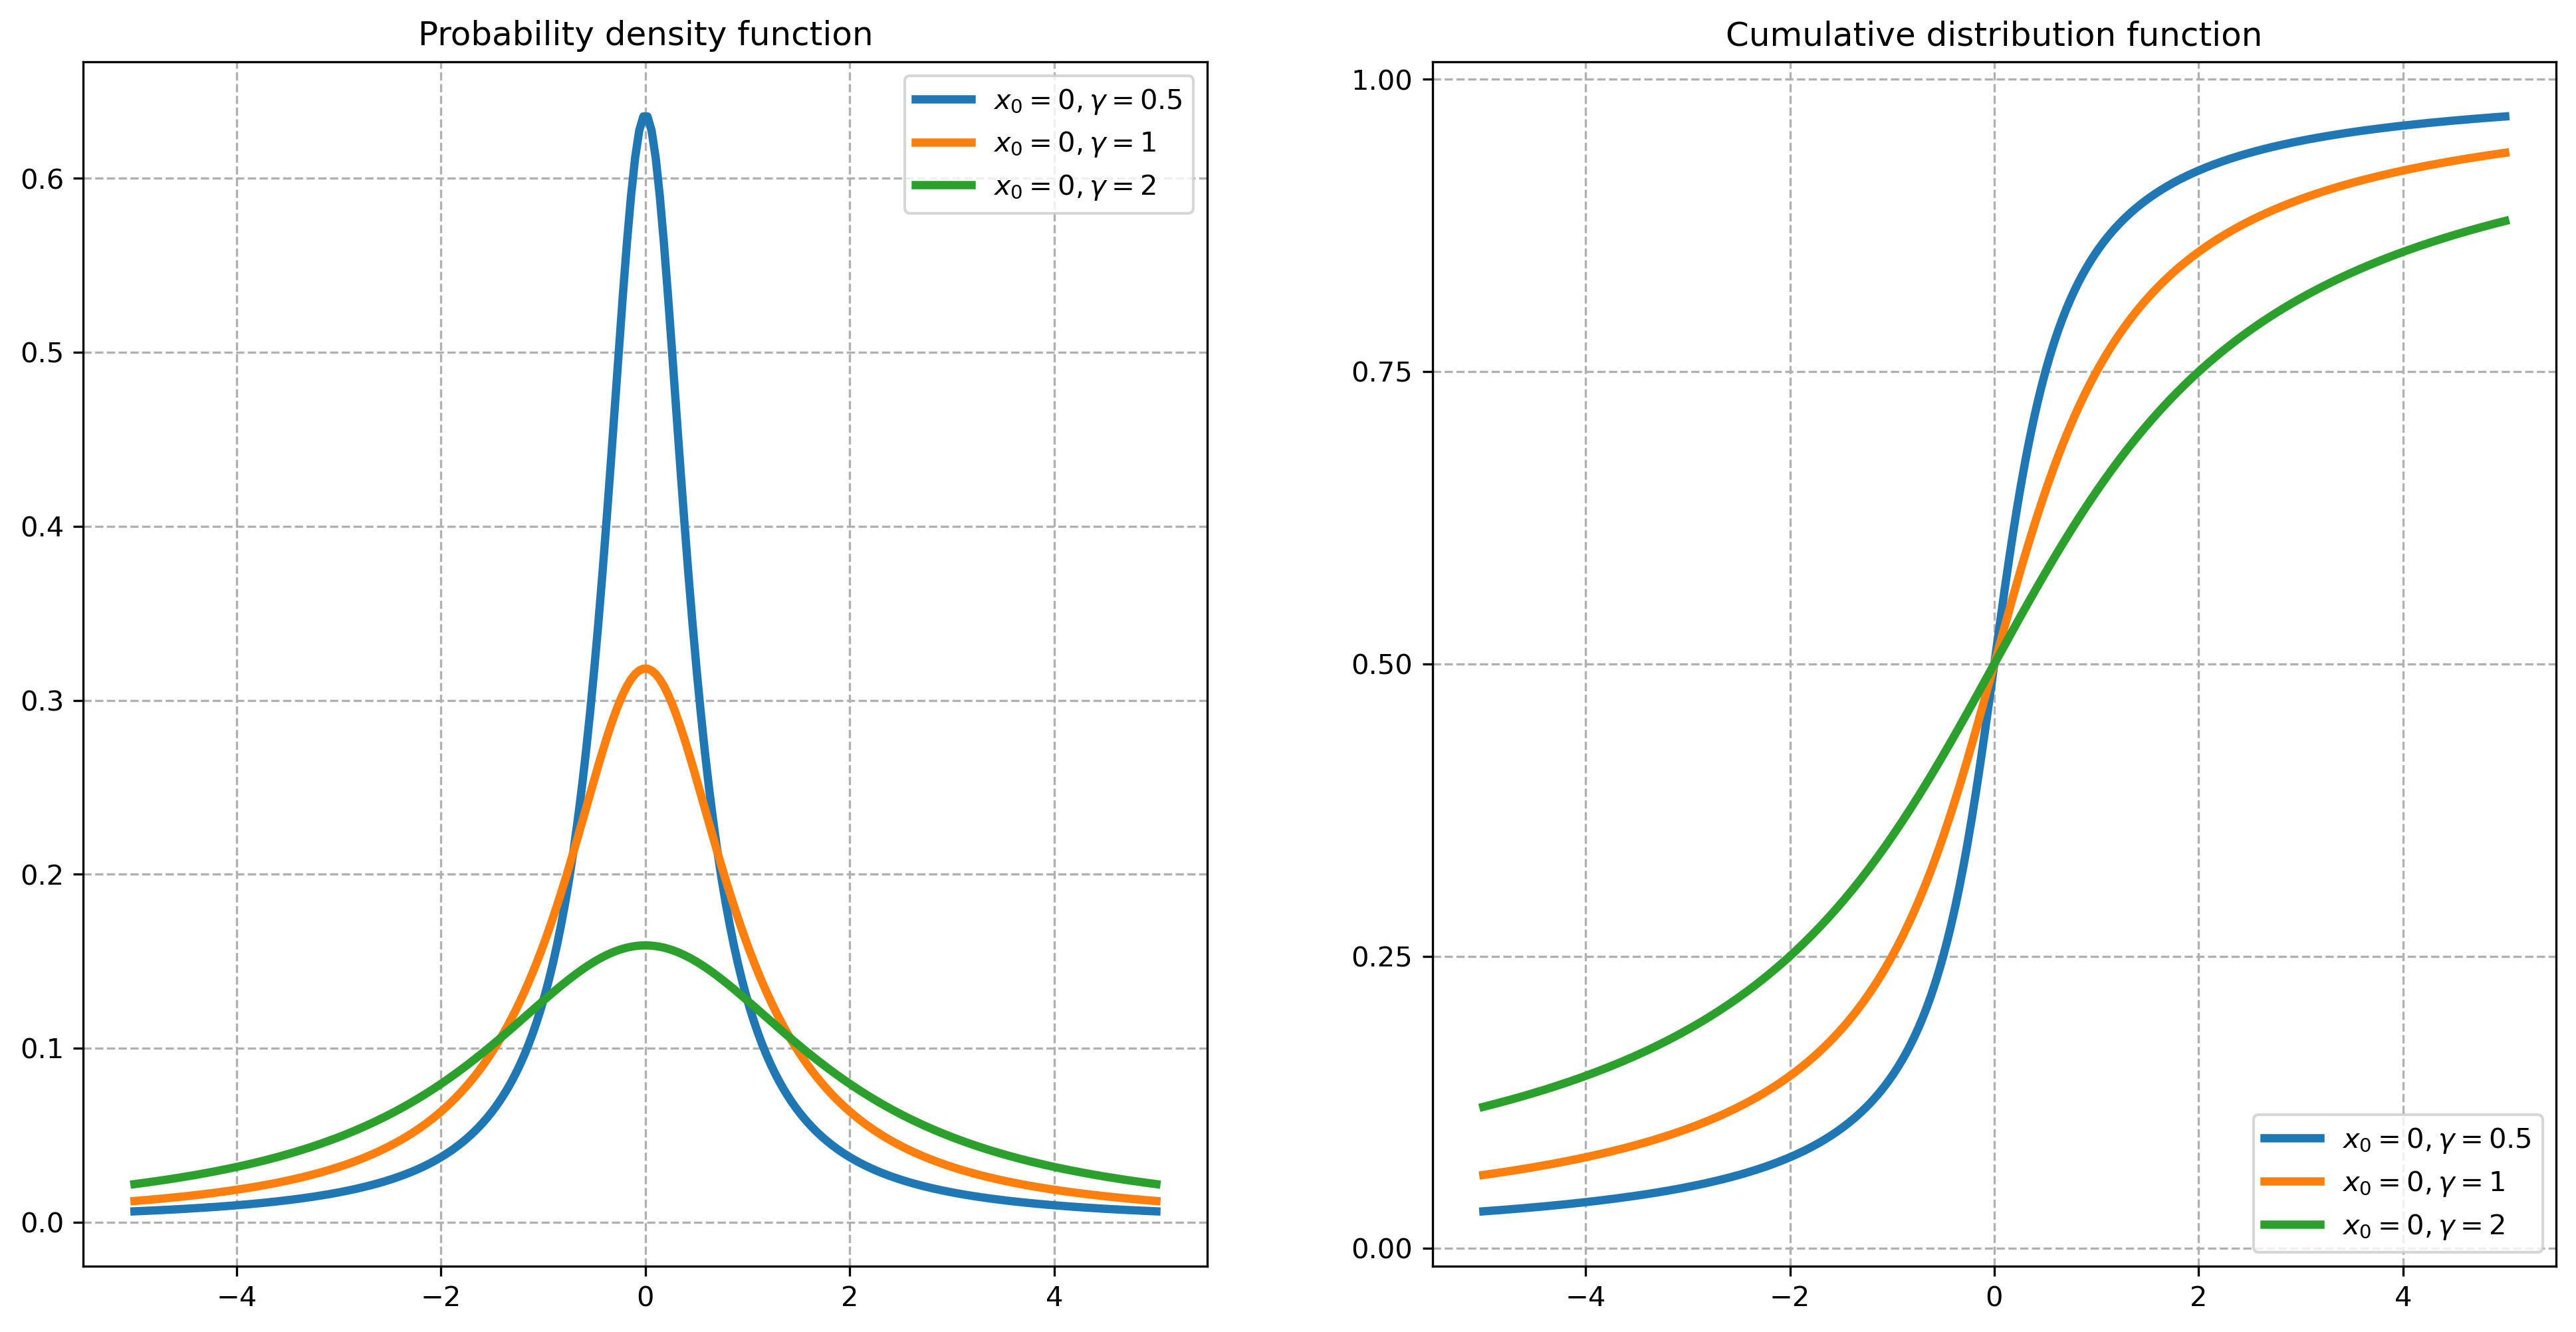

In [28]:
# Cauchy pdf/cdf
from scipy.stats import cauchy

x = np.linspace(-5, 5, 250)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

x0 = 0
for γ in [0.5, 1, 2]:
    ax1.plot(x, cauchy.pdf(x, loc=x0, scale=γ), lw=3, label='$x_0={},\gamma={}$'.format(x0,γ))
    ax2.plot(x, cauchy.cdf(x, loc=x0, scale=γ), lw=3, label='$x_0={},\gamma={}$'.format(x0,γ))

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
    
ax1.grid(ls='--')
ax2.grid(ls='--')

ax1.set_title('Probability density function')
ax2.set_title('Cumulative distribution function')

ax2.set_yticks([0, .25, .5, .75, 1])
    
plt.show()

In fact, the mean, variance, and higher central moments of the Cauchy distribution are all undefined. The condition for the LLN that $E(|X|)<\infty$ therefore fails, and the LLN does not hold.

We can see this in the simulation below. Note the significant scale change in this figure relative to the earlier example; some of the observations are extremely large, and these outliers throw off the scale of the chart—and lead to the phenomenon that there simply is no mean for these random variables. However much data we collect, the average value of the data will continue to jump around.

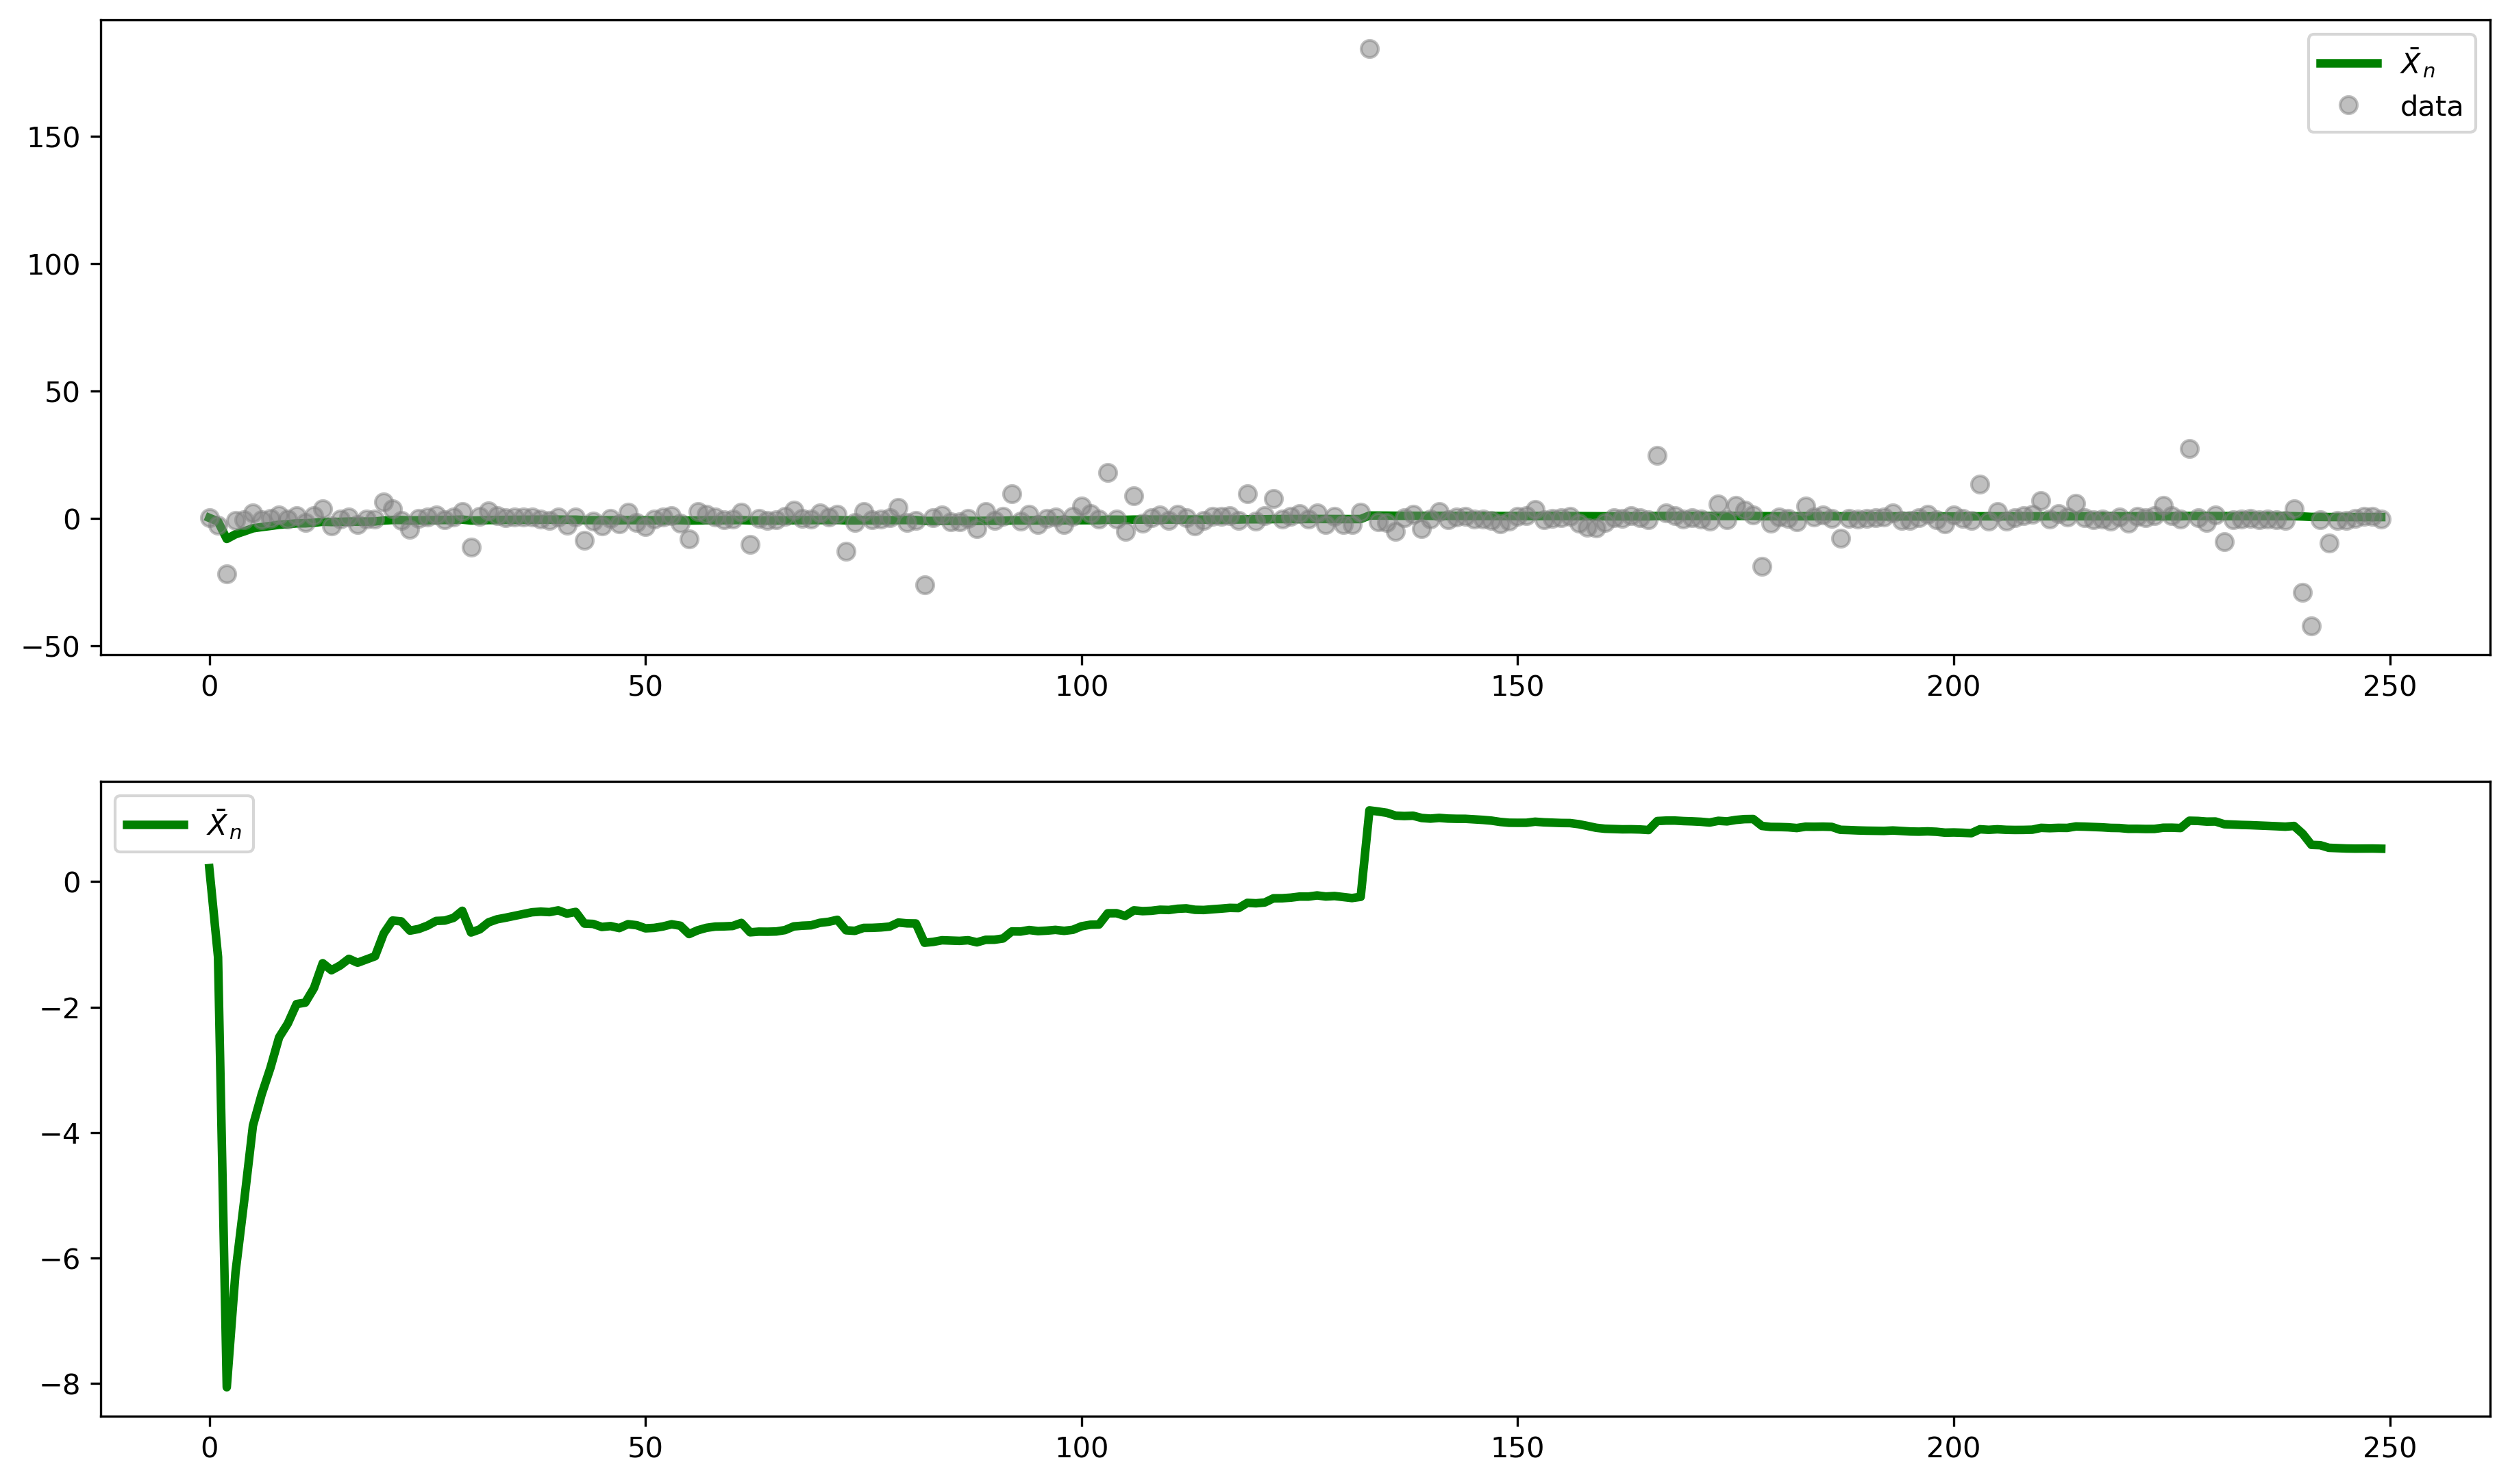

In [29]:
n = 250
draws = cauchy(0,1).rvs(n)

cummean = draws.cumsum() / np.arange(1,n+1)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,9))
ax1.plot(cummean, 'g-', lw=3, label='$\\bar X_n$')
ax1.plot(np.arange(n), draws, 'o', color='grey', alpha=0.5, label='data')
ax1.legend()

ax2.plot(cummean, 'g-', lw=3, label='$\\bar X_n$')
ax2.legend()

plt.show()

## Estimating higher moments

The sample estimates variance, skewness, and kurtosis are, respectively,

$$\hat{\sigma}_x^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar x)^2,$$

$$\hat{S}(x) = \frac{1}{(n-1)\hat{\sigma}_x^3}\sum_{i=1}^n (x_i - \bar x)^3,$$

$$\hat{K}(x) = \frac{1}{(n-1)\hat{\sigma}_x^4}\sum_{i=1}^n (x_i - \bar x)^4.$$

In [15]:
# estimate the variance from a sample of 10 draws
scs.bernoulli(p).rvs(10).var()

0.20999999999999996

In [16]:
# compare to the population variance
p * (1-p)

0.24

In [17]:
# equivalently
scs.bernoulli(p).var()

0.24

:::{warning}
Note the difference between `scs.bernoulli(p).var()` and `scs.bernoulli(p).rvs(10).var()`. The former gives the *population* variance for a Bernoulli distribution, while the latter gives the *sample variance* from 10 draws of random variables from this distribution.
:::

If $X$ is normally distributed, $\hat{S}(x)$ and $\hat{K}(x)-3$ are asymptotically normally distributed with mean zero and variances $6/T$ and $24/T$, respectively.

## Sample covariance and correlation

The sample covariance is

$$\hat \cov(x,y) := \frac{1}{n-1} \sum_{i=1}^n (x_i-\bar x)(y_i - \bar y).$$

The sample correlation coefficient is

$$\hat \rho_{x,y} := \frac{\sum_{i=1}^n (x_i-\bar x)(y_i - \bar y)}{\hat \sigma_x \hat \sigma_y}.$$

Let's apply these to some simulated data. We'll take 10 draws from $X \sim \N(0,1)$ and then define

$$y_i = 2 + 3 x_i + \varepsilon_i,$$

where $\varepsilon_i \sim \N(0,1)$ and is independent of $x_i$.

So while the $x_i$ and $\varepsilon_i$ are independent, $y_i$ obviously depends on $x_i$.

:::{admonition} Exercise

Given this relation between $X$ and $Y$ calculate the theoretical value of $\cov(X,Y)$. Simply apply the formulas for $\cov(aX,bY)$ and $\cov(a+X,b+Y)$ to this case. Write down the variance–covariance matrix for $X$ and $Y$ so you can compare it to the estimates we get below.

:::

:::{admonition} Solution
:class: admonition-solution, dropdown

Since $X\sim\N(0,1)$, it's variance is 1. The variance of $Y$ is therefore

\begin{align*}
\var(Y) &= \var(2 + 3X + 3\varepsilon) \\
&= 3^2\var(X) + 3^2\var(\epsilon) \\
&= 18.
\end{align*}

The covariance is
\begin{align*}
\cov(X,Y) &= \cov(X, 2 + 3X + 3\varepsilon) \\
&= \cov(X, 2) + 3\cov(X,X) + 3\cov(X,\varepsilon) \\
&= 0 + 3\var(X) + 0 \\
&= 3,
\end{align*}

where we have used the fact that $\cov(X,\epsilon)=0$, since the two random variables are independent. The variance–covariance matrix is therefore

$$\Sigma = \begin{pmatrix}
1 & 3 \\
3 & 18 \\
\end{pmatrix}.
$$

The correlation is

$$\rho_{X,Y} = \frac{3}{1 \times \sqrt{18}} = \frac{1}{\sqrt{2}} \approx 0.707.$$
:::

In [7]:
rng = np.random.default_rng(554321)

n = 10
x = rng.standard_normal(n)
y = 2 + 3*x + 3*rng.standard_normal(n)

Here's a plot of each of the $(x_i,y_i)$ pairs:

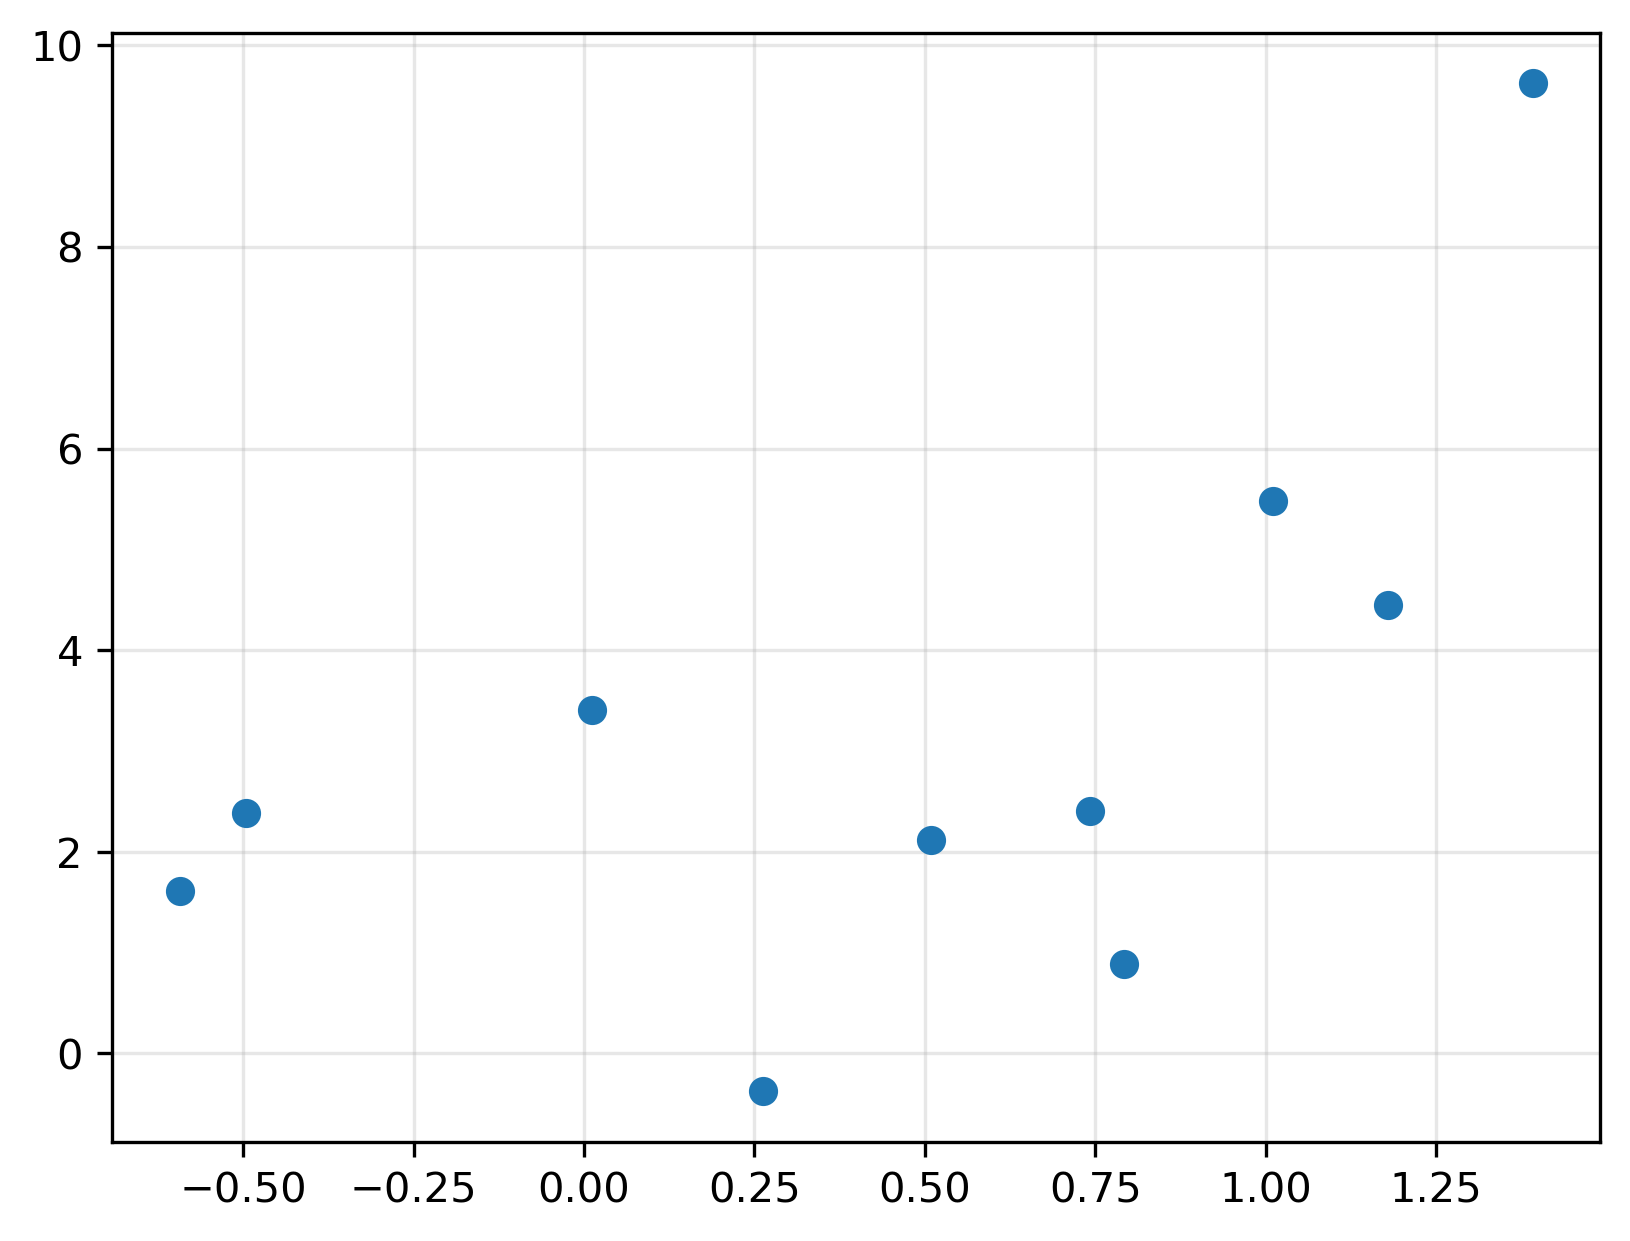

In [8]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o')
ax.grid(alpha=0.3)
plt.show()

Calculating the sample covariance and correlation is simple:

In [9]:
np.cov(x,y)

array([[0.45969233, 1.12805832],
       [1.12805832, 7.90773061]])

In [10]:
np.corrcoef(x,y)

array([[1.        , 0.59165971],
       [0.59165971, 1.        ]])

:::{admonition} Exercise

Experiment with this simulation by increasing $N$. Verify that the sample covariance and correlation matrix converge to their theoretical values.
:::

:::{admonition} Exercise

Experiment by changing the other parameters in the the equation for $Y$ and see if the sample mean and variance of the $y_i$ behave as you expect.
:::

:::{admonition} Solution
:class: admonition-solution, dropdown

If we generalize the equation for $Y$ to be

$$Y = a + bX + c\varepsilon,$$

we can see that 

$$\Sigma = \begin{pmatrix}
1 & b \\
b & b^2 + c^2 \\
\end{pmatrix},
$$

and therefore

$$\rho_{X,Y} = \frac{b}{\sqrt{b^2+c^2}} = \frac{1}{\sqrt{1+\frac{c^2}{b^2}}}.$$
:::

## Hypothesis testing

Typically we estimate parameters of a model to test some hypothesis. For example, a large literature investigates whether the equity premium (the excess return of the market portfolio over the riskfree rate) is predictable. A typical regression looks like this:

$${\rm{Equity}}\,{\rm{Premium}}_t = \gamma_0 + \gamma_1 x_{t - 1} + \varepsilon_t.$$

The coefficient $\gamma_1$ measures how important some variable $x$ is in predicting the equity premium. As {cite:ts}`welch2008comprehensive` note, the most prominent $x$ variables explored in the literature are the dividend price ratio and dividend yield, the earnings price ratio and dividend-earnings (payout) ratio, various interest rates and spreads, the inflation rates, the book-to-market ratio, volatility, the investment-capital ratio, the consumption, wealth, and income ratio, and aggregate net or equity issuing activity.

As we'll see in the next chapter, we can use data to estimate $\gamma_0$ and $\gamma_1$. These estimates are functions of the random realizations of data, and so the estimates are themselves random variables.

To perform a formal statistical test, we begin by stating a *null hypothesis*. In this case, we might decide that the null hypothesis is that there is no predictability:

$$H_0: \gamma_1 = 0.$$

The *alternative* is that $\gamma_1 \neq 0.$ Since either a positive or negative sign on $x_{t-1}$ would imply that the variable helps predict the equity premium, we will take evidence that $\gamma_1<0$ or $\gamma_1>0$ as evidence against the null.

:::{note}

The null hypothesis is what we believe to be true in the absense of evidence against it. In our judicial system, the null hypothesis is that a person is innocent. Only when there is strong evidence against this do we declare that the person is guilty.

Two types of errors are possible in such a setting. First, we might wrongly conclude that the null hypothsis is false. This is what happens when a person is mistakenly convicted of a crime they did not commit. Second, we might fail to overturn the null hypothesis even though it is in fact false. This is akin to a guilty person going free. The first mistake is called a *type 1 error* and the second is a *type 2 error*. There is always a tradeoff between these two types of errors: any test that we devise must prioritize minimizing one or the other type of error. Obviously in our legal system we try to minimize type 1 errors on the undertanding that we will sometimes let guilty people go.

:::

Consider another simple example. Suppose the return on a asset $i$ during time $t$ is assumed to be

$$R_{i,t} = \mu_i + \varepsilon_{i,t}$$

where $\mu_i$ is the assets expected return and $\varepsilon_{i,t}\sim \N(0,\sigma_i^2)$ is the statistical noise in the return.

:::{admonition} Exercise

In this model, what is $\E(R_i)$? What is $\var(R_i)$?
:::

Suppose we wish to test the hypothesis

$$H_0: \mu_i = 0.$$

Our estimate for the expected value, $\mu$, is simply the average of the $R_{i,t}$. We saw that the central limit theorem says that $E(\bar R) = \mu$ and $\var(\bar R) = \frac{\sigma^2}{T}$. This means that *under the null hypothesis* the distribution of $\bar R$ would look like this:

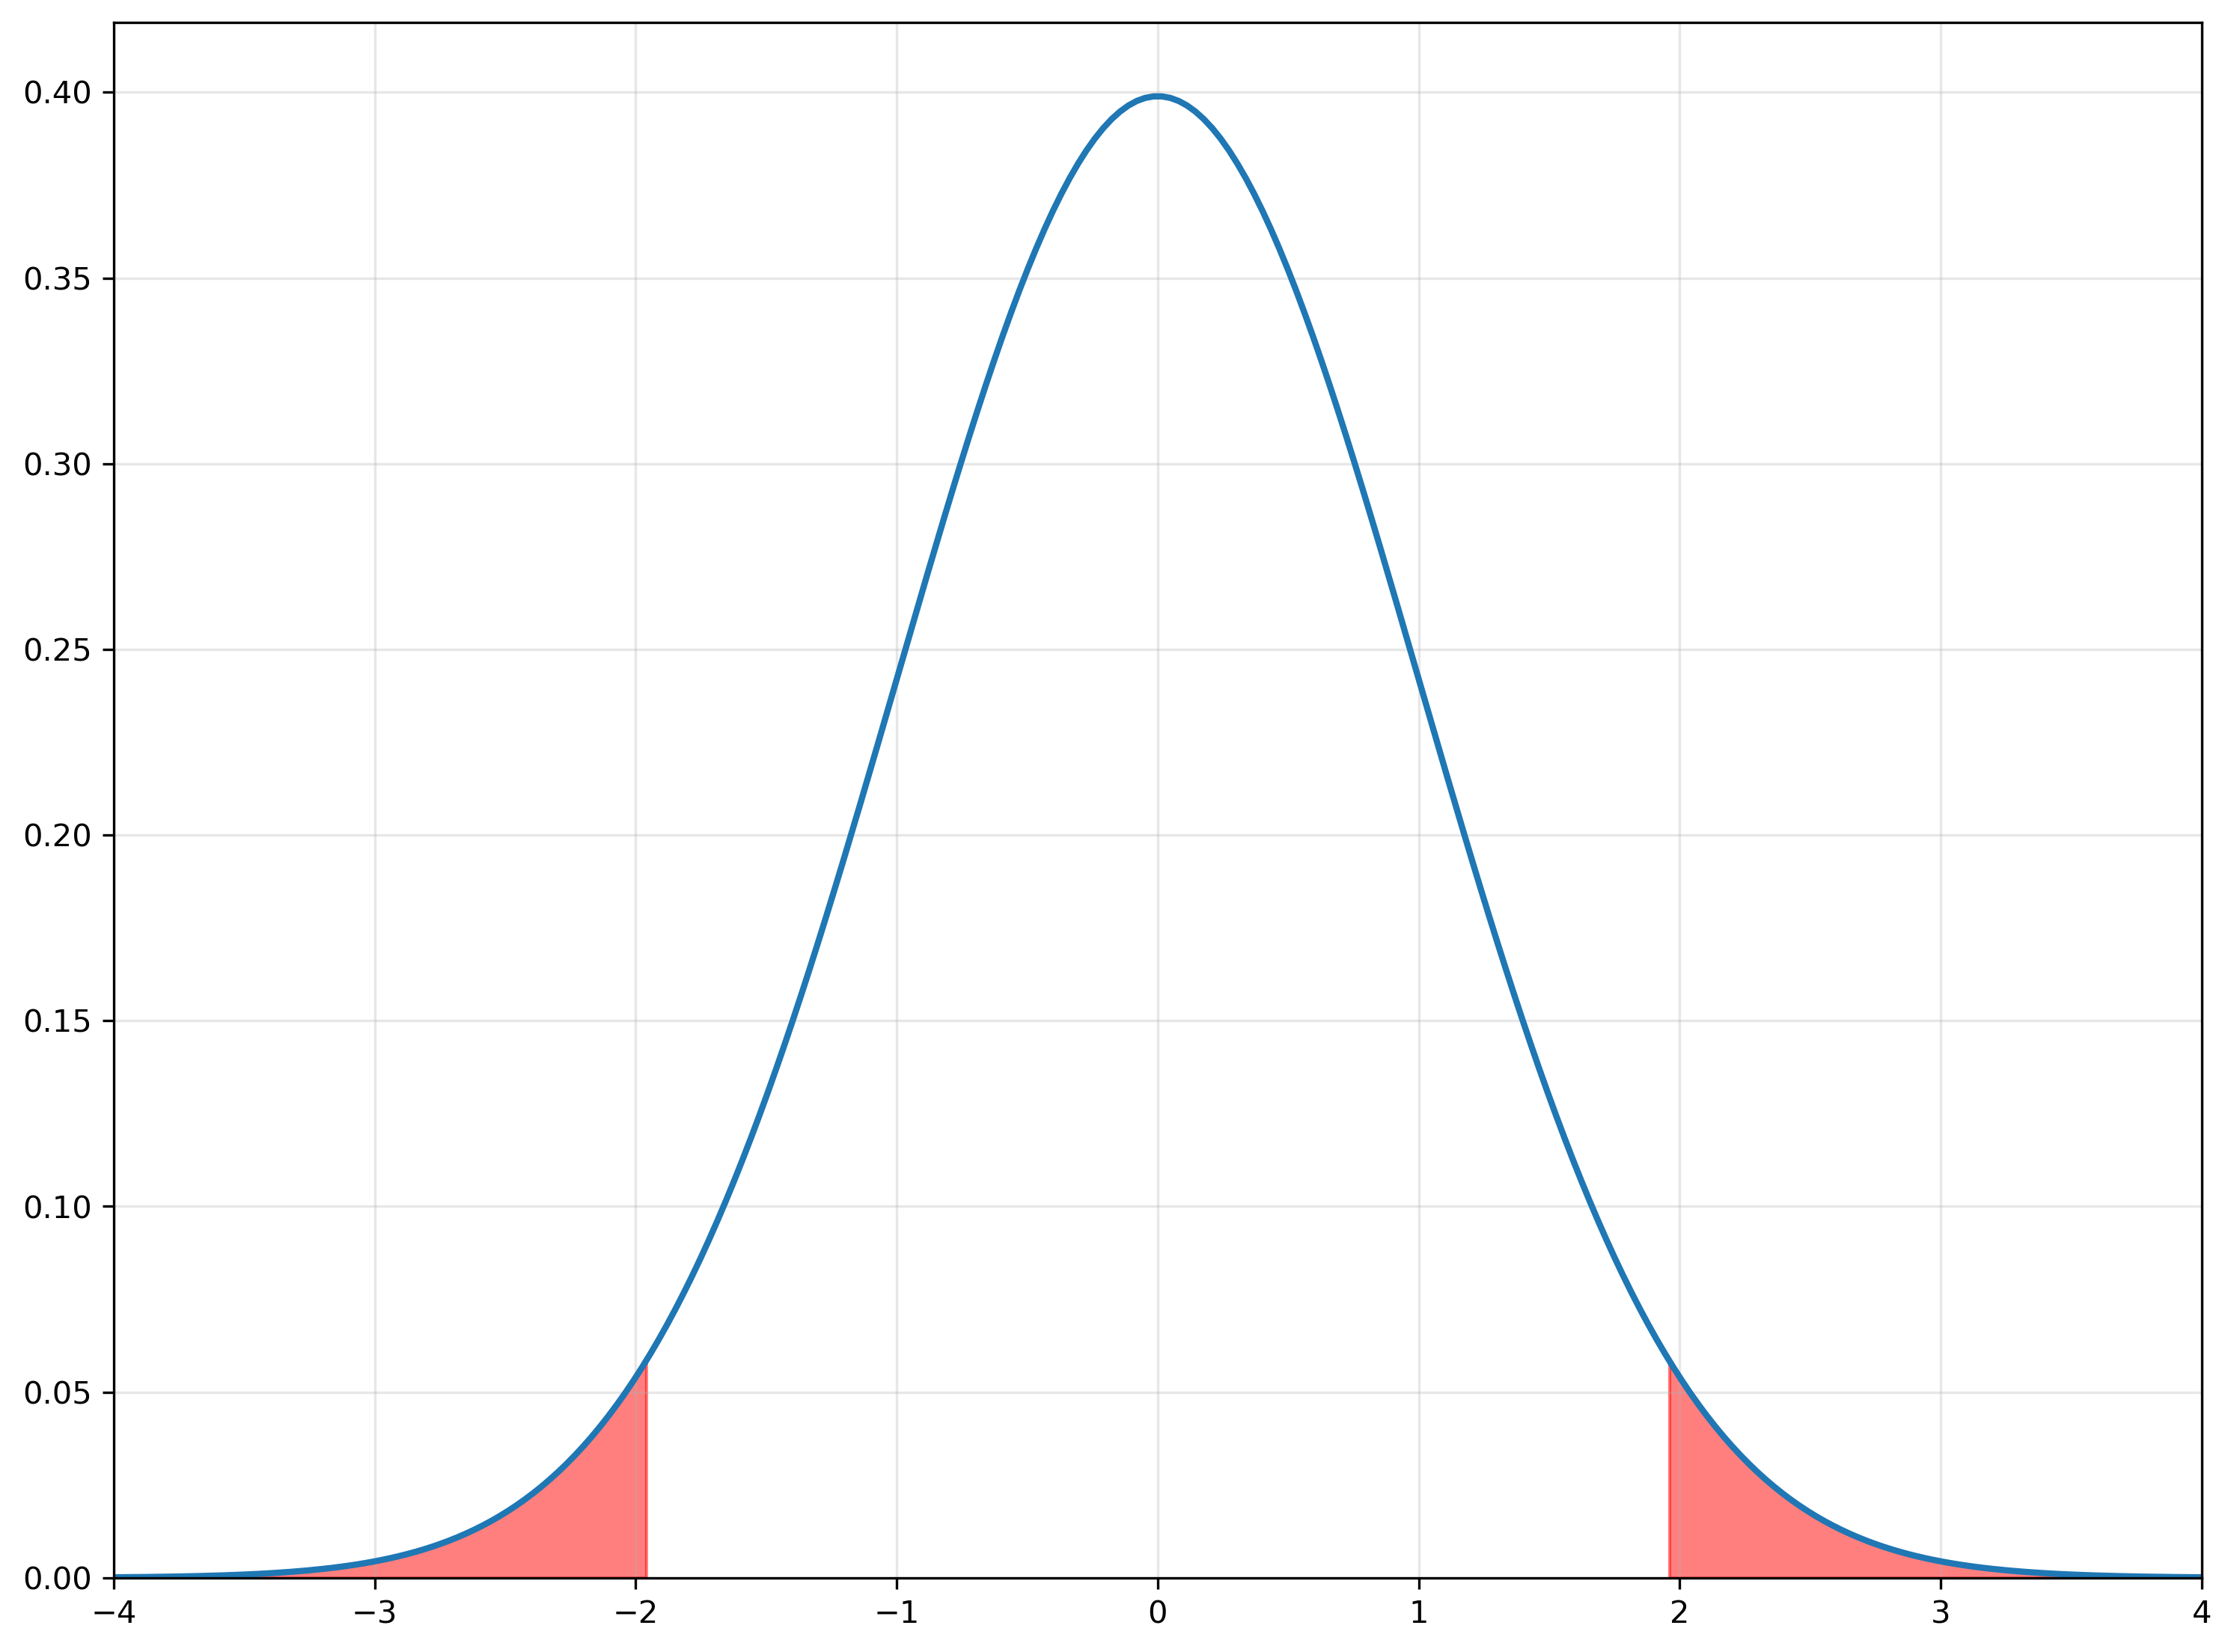

In [9]:
fig, ax = plt.subplots(figsize=(12,9))

# pdf
x = np.linspace(-4,4,250)
ax.plot(x, scs.norm.pdf(x), '-', lw=2)

p = scs.norm.ppf(0.025)

# fill in the tails
px1 = np.linspace(-4,p,100)
ax.fill_between(px1, scs.norm.pdf(px1), color='red', alpha=0.5)

px2 = np.linspace(-p,4,100)
ax.fill_between(px2, scs.norm.pdf(px2), color='red', alpha=0.5)

ax.grid(alpha=0.3)
ax.set_ylim((0,None))
ax.set_xlim(-4,4)

plt.show()

(To keep things simple, this graph is created assuming the variance is just one. Obviously we can generalize that without changing the main idea.)